In [2]:
import pandas as pd
import numpy as np
%load_ext autoreload
%autoreload 2

In [3]:
CPI = r'C:\Users\juliu\OneDrive\Skrivebord\dataseminar\CPI2023_GlobalResultsTrends.xlsx'

CPI = pd.read_excel(CPI)
CPI = CPI.iloc[2:]
CPI.reset_index(drop=True, inplace=True)
CPI.columns = CPI.iloc[0]
CPI = CPI.iloc[1:]


In [4]:
# Read the DataFrame containing the "Monarchy" column (replace 'path_to_w2_excel_file' with the actual file path)
w2 = pd.read_excel(r"C:\Users\juliu\Downloads\w2 (1).xlsx")

# Merge the "Monarchy" column into the CPI DataFrame based on a common column
CPI = pd.merge(CPI, w2[['Country','Monarchy']],how='left', left_on='Country / Territory', right_on='Country')

CPI.drop(columns=['Country'], inplace=True)

# Display the updated DataFrame
display(CPI)



# Check for missing values in the "Monarchy" column
missing_monarchy = CPI['Monarchy'].isnull().sum()

# Print the number of missing values
print("Number of missing values in Monarchy column:", missing_monarchy)

,Country / Territory,ISO3,Region,CPI score 2023,Rank,Standard error,Number of sources,Lower CI,Upper CI,African Development Bank CPIA,...,Freedom House Nations in Transit,Global Insights Country Risk Ratings,IMD World Competitiveness Yearbook,PERC Asia Risk Guide,PRS International Country Risk Guide,Varieties of Democracy Project,World Bank CPIA,World Economic Forum EOS,World Justice Project Rule of Law Index,Monarchy
0,Denmark,DNK,WE/EU,90,1,1.819265,8,87.0164,92.9836,NaN,...,NaN,83.25637,97.89119,NaN,100,78.89152,NaN,82.20667,87.68097,1.0
1,Finland,FIN,WE/EU,87,2,1.057962,8,85.26495,88.73505,NaN,...,NaN,83.25637,89.84466,NaN,93.38018,78.16811,NaN,86.76612,85.88441,0.0
2,New Zealand,NZL,AP,85,3,1.916107,8,81.85758,88.14242,NaN,...,NaN,83.25637,87.10542,NaN,93.38018,78.16811,NaN,70.98344,82.2913,1.0
3,Norway,NOR,WE/EU,84,4,1.380803,7,81.73548,86.26452,NaN,...,NaN,83.25637,75.72045,NaN,84.67139,78.16811,NaN,NaN,86.78268,1.0
4,Singapore,SGP,AP,83,5,1.145734,9,81.12099,84.87901,NaN,...,NaN,83.25637,76.74767,89.29896,83.27798,78.16811,NaN,88.51975,84.08785,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Yemen,YEM,MENA,16,176,1.753443,7,13.12435,18.87565,NaN,...,NaN,10.21805,NaN,NaN,15.00106,13.06165,10.11772,28.54554,NaN,0.0
176,South Sudan,SSD,SSA,13,177,1.328441,5,10.82136,15.17864,11.19116,...,NaN,10.21805,NaN,NaN,NaN,18.84889,10.11772,NaN,NaN,0.0
177,Syria,SYR,MENA,13,177,1.578473,5,10.4113,15.5887,NaN,...,NaN,10.21805,NaN,NaN,15.00106,12.33825,NaN,NaN,NaN,0.0
178,Venezuela,VEN,AME,13,177,1.226027,8,10.98932,15.01068,NaN,...,NaN,10.21805,22.21965,NaN,12.91095,8.721219,NaN,16.27012,8.632427,0.0


Number of missing values in Monarchy column: 16


In [5]:
missing_monarchy = CPI[CPI['Monarchy'].isna()]['Country / Territory']
print("Country/Territory with missing Monarchy values:")
print(missing_monarchy)

Country/Territory with missing Monarchy values:
14                            Hong Kong
27                               Taiwan
29                              Bahamas
31                         Korea, South
36     Saint Vincent and the Grenadines
40                              Czechia
45                          Saint Lucia
47                             Slovakia
67                Sao Tome and Principe
77                                 Cuba
101                              Gambia
136                                Laos
141                          Kyrgyzstan
150                                Iran
158                               Congo
173                        Korea, North
Name: Country / Territory, dtype: object


In [6]:
manual_encoding = {
    'Hong Kong':0,
    'Taiwan':0,
    'Bahamas':1,
    'Korea, South':0,
    'Saint Vincent and the Grenadines':1,
    'Czechia':0,
    'Saint Lucia':1,
    'Slovakia':0,
    'Sao Tome and Principe':0,
    'Cuba':0,
    'Gambia':0,
    'Laos':0,
    'Kyrgyzstan':0,
    'Iran':0,
    'Congo':0,
    'Korea, North':0

}

for country, monarchy_status in manual_encoding.items():
    CPI.loc[CPI['Country / Territory'] == country, 'Monarchy'] = monarchy_status

In [7]:
missing_monarchy = CPI[CPI['Monarchy'].isna()]['Country / Territory']
print("Country/Territory with missing Monarchy values:")
print(missing_monarchy)

Country/Territory with missing Monarchy values:
Series([], Name: Country / Territory, dtype: object)


In [8]:
print(CPI.dtypes)
CPI['CPI score 2023'] = pd.to_numeric(CPI['CPI score 2023'], errors='coerce')

Country / Territory                                     object
ISO3                                                    object
Region                                                  object
CPI score 2023                                          object
Rank                                                    object
Standard error                                          object
Number of sources                                       object
Lower CI                                                object
Upper CI                                                object
African Development Bank CPIA                           object
Bertelsmann Foundation Sustainable Governance Index     object
Bertelsmann Foundation Transformation Index             object
Economist Intelligence Unit Country Ratings             object
Freedom House Nations in Transit                        object
Global Insights Country Risk Ratings                    object
IMD World Competitiveness Yearbook                     

In [9]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display(CPI.head())

,Country / Territory,ISO3,Region,CPI score 2023,Rank,Standard error,Number of sources,Lower CI,Upper CI,African Development Bank CPIA,Bertelsmann Foundation Sustainable Governance Index,Bertelsmann Foundation Transformation Index,Economist Intelligence Unit Country Ratings,Freedom House Nations in Transit,Global Insights Country Risk Ratings,IMD World Competitiveness Yearbook,PERC Asia Risk Guide,PRS International Country Risk Guide,Varieties of Democracy Project,World Bank CPIA,World Economic Forum EOS,World Justice Project Rule of Law Index,Monarchy
0,Denmark,DNK,WE/EU,90,1,1.819265,8,87.0164,92.9836,NaN,96.99364,NaN,89.67447,NaN,83.25637,97.89119,NaN,100,78.89152,NaN,82.20667,87.68097,1.0
1,Finland,FIN,WE/EU,87,2,1.057962,8,85.26495,88.73505,NaN,88.12477,NaN,89.67447,NaN,83.25637,89.84466,NaN,93.38018,78.16811,NaN,86.76612,85.88441,0.0
2,New Zealand,NZL,AP,85,3,1.916107,8,81.85758,88.14242,NaN,96.99364,NaN,89.67447,NaN,83.25637,87.10542,NaN,93.38018,78.16811,NaN,70.98344,82.2913,1.0
3,Norway,NOR,WE/EU,84,4,1.380803,7,81.73548,86.26452,NaN,88.12477,NaN,89.67447,NaN,83.25637,75.72045,NaN,84.67139,78.16811,NaN,NaN,86.78268,1.0
4,Singapore,SGP,AP,83,5,1.145734,9,81.12099,84.87901,NaN,NaN,72.74066,89.67447,NaN,83.25637,76.74767,89.29896,83.27798,78.16811,NaN,88.51975,84.08785,0.0


In [10]:
import statsmodels.api as sm

# Fit the regression model
y = CPI['CPI score 2023']  
x = CPI['Monarchy']        
x = sm.add_constant(x)     # Add a constant term to the independent variable

# Fit the regression model
model = sm.OLS(y, x).fit(cov_type='HC1')

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         CPI score 2023   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     27.68
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           4.08e-07
Time:                        16:00:26   Log-Likelihood:                -768.26
No. Observations:                 180   AIC:                             1541.
Df Residuals:                     178   BIC:                             1547.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.6190      1.416     27.977      0.0

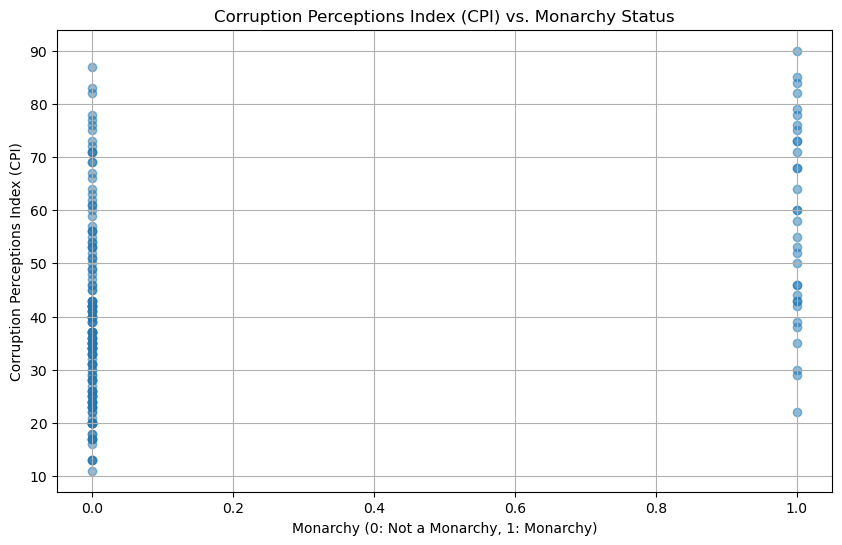

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(CPI['Monarchy'], CPI['CPI score 2023'], alpha=0.5)
plt.title('Corruption Perceptions Index (CPI) vs. Monarchy Status')
plt.xlabel('Monarchy (0: Not a Monarchy, 1: Monarchy)')
plt.ylabel('Corruption Perceptions Index (CPI)')
plt.grid(True)
plt.show()

In [12]:
trust = r"C:\Users\juliu\OneDrive\Skrivebord\dataseminar\qog_std_cs_jan24_stata14.dta"
trust = pd.read_stata(trust)




In [13]:

trust['cname_qog'].nunique()

194

In [14]:
rename_dict = {
    'Ethiopia (1993-)': 'Ethiopia',
    'France (1963-)': 'France',
    'Malaysia (1966-)': 'Malaysia',
    'Cyprus (1975-)': 'Cyprus',
    'Pakistan (1971-)': 'Pakistan',
    'Sudan (2012-)': 'Sudan',
    'Eswatini (former Swaziland)': 'Eswatini',
    'Congo, Democratic Republic': 'Democratic Republic of the Congo',
    'Cape Verde': 'Cabo Verde',
    'St Lucia': 'Saint Lucia',
    'Cote d\'Ivoire': "Côte d\'Ivoire",
    'Czech Republic': 'Czechia',
    'St Vincent and the Grenadines': 'Saint Vincent and the Grenadines',
    # Add more mappings as needed
}

# Use the replace function to rename the values in the "cname" column
trust['cname_qog'] = trust['cname_qog'].replace(rename_dict)

In [15]:
identical_values = pd.merge(CPI['Country / Territory'], trust['cname_qog'], how='inner', left_on='Country / Territory', right_on='cname_qog')
num_identical_values = identical_values.shape[0]
print("Number of identical values between CPI and trust:", num_identical_values)

# Step 2: Identify unique values in each DataFrame
unique_cpi_values = CPI[~CPI['Country / Territory'].isin(trust['cname_qog'])]['Country / Territory']
unique_trust_values = trust[~trust['cname_qog'].isin(CPI['Country / Territory'])]['cname_qog']

# Output the results
print("\nNumber of unique values in CPI DataFrame:", unique_cpi_values.nunique())
print("Unique values in CPI DataFrame:")
print(unique_cpi_values)

print("\nNumber of unique values in trust DataFrame:", unique_trust_values.nunique())
print("Unique values in trust DataFrame:")
print(unique_trust_values)


Number of identical values between CPI and trust: 178

Number of unique values in CPI DataFrame: 2
Unique values in CPI DataFrame:
14    Hong Kong
83       Kosovo
Name: Country / Territory, dtype: object

Number of unique values in trust DataFrame: 16
Unique values in trust DataFrame:
3                  Andorra
5      Antigua and Barbuda
21                  Belize
23                  Brunei
66                Kiribati
99           Liechtenstein
111                 Monaco
119                  Nauru
128             Micronesia
129       Marshall Islands
130                  Palau
145     St Kitts and Nevis
148             San Marino
173                  Tonga
179                 Tuvalu
191                  Samoa
Name: cname_qog, dtype: object


In [16]:

# Assuming 'trust' and 'CPI' are the names of your DataFrames

# Perform an inner merge on the two DataFrames based on the 'cname_qog' column from 'trust' and the 'Country / Territory' column from 'CPI'
merged_df = pd.merge(CPI, trust[['cname_qog', 'wvs_trust']], how='inner', left_on='Country / Territory', right_on='cname_qog')

# Drop the extra column 'cname_qog' from the merged DataFrame
merged_df.drop('cname_qog', axis=1, inplace=True)

# Now 'merged_df' contains the merged DataFrame with only the 'wvs_trust' column merged from 'trust' to 'CPI', and only matched observations

In [17]:
# Get unique values of 'Country / Territory' column in the original CPI DataFrame
unique_countries_cpi = CPI['Country / Territory'].unique()

# Get unique values of 'Country / Territory' column in the merged DataFrame
unique_countries_merged = merged_df['Country / Territory'].unique()

# Compare the unique values
common_countries = set(unique_countries_cpi).intersection(unique_countries_merged)
unique_to_cpi = set(unique_countries_cpi) - common_countries
unique_to_merged = set(unique_countries_merged) - common_countries

# Output the results
print("Number of common countries:", len(common_countries))
print("Number of unique countries in CPI:", len(unique_to_cpi))
print("Number of unique countries in merged DataFrame:", len(unique_to_merged))

print("\nUnique countries in CPI DataFrame:")
print(unique_to_cpi)

print("\nUnique countries in merged DataFrame:")
print(unique_to_merged)

Number of common countries: 178
Number of unique countries in CPI: 2
Number of unique countries in merged DataFrame: 0

Unique countries in CPI DataFrame:
{'Kosovo', 'Hong Kong'}

Unique countries in merged DataFrame:
set()


In [18]:
display(merged_df.head())

,Country / Territory,ISO3,Region,CPI score 2023,Rank,Standard error,Number of sources,Lower CI,Upper CI,African Development Bank CPIA,Bertelsmann Foundation Sustainable Governance Index,Bertelsmann Foundation Transformation Index,Economist Intelligence Unit Country Ratings,Freedom House Nations in Transit,Global Insights Country Risk Ratings,IMD World Competitiveness Yearbook,PERC Asia Risk Guide,PRS International Country Risk Guide,Varieties of Democracy Project,World Bank CPIA,World Economic Forum EOS,World Justice Project Rule of Law Index,Monarchy,wvs_trust
0,Denmark,DNK,WE/EU,90,1,1.819265,8,87.0164,92.9836,NaN,96.99364,NaN,89.67447,NaN,83.25637,97.89119,NaN,100,78.89152,NaN,82.20667,87.68097,1.0,0.740905
1,Finland,FIN,WE/EU,87,2,1.057962,8,85.26495,88.73505,NaN,88.12477,NaN,89.67447,NaN,83.25637,89.84466,NaN,93.38018,78.16811,NaN,86.76612,85.88441,0.0,0.697804
2,New Zealand,NZL,AP,85,3,1.916107,8,81.85758,88.14242,NaN,96.99364,NaN,89.67447,NaN,83.25637,87.10542,NaN,93.38018,78.16811,NaN,70.98344,82.2913,1.0,0.595025
3,Norway,NOR,WE/EU,84,4,1.380803,7,81.73548,86.26452,NaN,88.12477,NaN,89.67447,NaN,83.25637,75.72045,NaN,84.67139,78.16811,NaN,NaN,86.78268,1.0,0.728400
4,Singapore,SGP,AP,83,5,1.145734,9,81.12099,84.87901,NaN,NaN,72.74066,89.67447,NaN,83.25637,76.74767,89.29896,83.27798,78.16811,NaN,88.51975,84.08785,0.0,0.346219


In [81]:
filtered_df = merged_df[~merged_df['Country / Territory'].isin(['Hong Kong', 'Kosovo'])]


In [20]:

filtered_df.isnull().sum()

Country / Territory                                      0
ISO3                                                     0
Region                                                   0
CPI score 2023                                           0
Rank                                                     0
Standard error                                           0
Number of sources                                        0
Lower CI                                                 0
Upper CI                                                 0
African Development Bank CPIA                          141
Bertelsmann Foundation Sustainable Governance Index    137
Bertelsmann Foundation Transformation Index             42
Economist Intelligence Unit Country Ratings             48
Freedom House Nations in Transit                       150
Global Insights Country Risk Ratings                     0
IMD World Competitiveness Yearbook                     115
PERC Asia Risk Guide                                   1

In [83]:
filtered_df.dropna(subset=['wvs_trust'], inplace=True)

In [84]:
print(filtered_df['Country / Territory'].nunique())

84


In [22]:

# Fit the regression model
y = filtered_df['CPI score 2023']  
x = filtered_df['wvs_trust']        
x = sm.add_constant(x)     # Add a constant term to the independent variable

# Fit the regression model
model = sm.OLS(y, x).fit(cov_type='HC1')

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         CPI score 2023   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     118.0
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           1.50e-17
Time:                        16:00:57   Log-Likelihood:                -338.32
No. Observations:                  84   AIC:                             680.6
Df Residuals:                      82   BIC:                             685.5
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.3071      2.300     11.872      0.0

In [23]:
# Fit the regression model
y = filtered_df['wvs_trust']  
x = filtered_df['Monarchy']        
x = sm.add_constant(x)     # Add a constant term to the independent variable

# Fit the regression model
model = sm.OLS(y, x).fit(cov_type='HC1')

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              wvs_trust   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     17.11
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           8.49e-05
Time:                        16:01:01   Log-Likelihood:                 35.442
No. Observations:                  84   AIC:                            -66.88
Df Residuals:                      82   BIC:                            -62.02
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2101      0.018     11.622      0.0

In [24]:

# Define the endogenous variable (dependent variable)
y = filtered_df['CPI score 2023']

# Define the exogenous variables (independent variables)
x_monarchy = filtered_df['Monarchy']
x_wvs_trust = filtered_df['wvs_trust']

# Add a constant term to the independent variables
x = sm.add_constant(pd.concat([x_monarchy, x_wvs_trust], axis=1))  

# Fit the regression model
model = sm.OLS(y, x).fit(cov_type='HC1')

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         CPI score 2023   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     86.87
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           7.03e-21
Time:                        16:01:03   Log-Likelihood:                -337.77
No. Observations:                  84   AIC:                             681.5
Df Residuals:                      81   BIC:                             688.8
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.7158      2.343     11.827      0.0

In [26]:
for col in filtered_df.select_dtypes(include='object'):
    filtered_df[col] = filtered_df[col].astype(str)

# Replace None values with an empty string or any other appropriate value
filtered_df = filtered_df.fillna('')
filtered_df.to_stata(r"C:\Users\juliu\Downloads\monarkistata.dta")

c:\Users\juliu\anaconda3\lib\site-packages\pandas\io\stata.py:2491: InvalidColumnName: 
Not all pandas column names were valid Stata variable names.
The following replacements have been made:

    Country / Territory   ->   Country___Territory
    CPI score 2023   ->   CPI_score_2023
    Standard error   ->   Standard_error
    Number of sources   ->   Number_of_sources
    Lower CI   ->   Lower_CI
    Upper CI   ->   Upper_CI
    African Development Bank CPIA   ->   African_Development_Bank_CPIA
    Bertelsmann Foundation Sustainable Governance Index   ->   Bertelsmann_Foundation_Sustainab
    Bertelsmann Foundation Transformation Index   ->   Bertelsmann_Foundation_Transform
    Economist Intelligence Unit Country Ratings   ->   Economist_Intelligence_Unit_Coun
    Freedom House Nations in Transit   ->   Freedom_House_Nations_in_Transit
    Global Insights Country Risk Ratings   ->   Global_Insights_Country_Risk_Rat
    IMD World Competitiveness Yearbook   ->   IMD_World_Competitiven

In [28]:
pip install linearmodels

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ----------- ---------------------------- 0.5/1.7 MB 9.6 MB/s eta 0:00:01
   ------------------------- -------------- 1.0/1.7 MB 13.3 MB/s eta 0:00:01
   ------------------------- -------------- 1.0/1.7 MB 13.3 MB/s eta 0:00:01
   ------------------------- -------------- 1.0/1.7 MB 13.3 MB/s eta 0:00:01
   ------------------------- -------------- 1.0/1.7 MB 13.3 MB/s eta 0:00:01
   ------------------------- -------------- 1.0/1.7 MB 13.3 MB/s eta 0:00:01
   ------------------------- -------------- 1.0/1.7 MB 13.3 MB/s eta 0:00:01
   ------------------------- -------------- 1.0/1.7 MB 13.3 MB/s eta 0:00:01
   ------------------------- -------------- 1.0/1.7 MB 13.3 MB/s eta 0:00:01
   ---------------------------------- ----- 1.4/1.7 MB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/94.2 kB ? eta -:--:--
   --------------

In [73]:
from linearmodels.iv import IV2SLS
import statsmodels.api as sm
from statsmodels.api import add_constant


# Assuming you have your data loaded into a DataFrame named filtered_df
# and it contains columns for 'CPI_Score_2023', 'Monarchy', and 'wvs_trust'

# Define the endogenous variable (dependent variable), exogenous variables (regressors),
# and instrumental variable
endog = filtered_df['CPI score 2023']
exog = filtered_df[['Monarchy']]  # Add more exogenous variables if necessary
instruments = filtered_df['wvs_trust']
exog_with_const = pd.concat([pd.Series(1, index=filtered_df.index, name='const')], axis=1)
# Perform 2SLS regression
iv_model = IV2SLS(dependent=endog, exog=exog_with_const, endog=instruments, instruments=exog)
iv_results = iv_model.fit(cov_type='robust', debiased=True) 


# Print regression results
print(iv_results)

                          IV-2SLS Estimation Summary                          
Dep. Variable:         CPI score 2023   R-squared:                      0.5199
Estimator:                    IV-2SLS   Adj. R-squared:                 0.5141
No. Observations:                  84   F-statistic:                    63.192
Date:                Sun, Mar 24 2024   P-value (F-stat)                0.0000
Time:                        17:29:54   Distribution:                  F(1,82)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          23.447     3.8785     6.0454     0.0000      15.732      31.163
wvs_trust      96.834     12.181     7.9494     0.00

In [117]:
Conf = r'C:\Users\juliu\OneDrive\Skrivebord\dataseminar\AAGK_xCountry.dta'
Conf = pd.read_stata(Conf)
Conf = Conf.drop(columns=['wvs_trust'])

c:\Users\juliu\anaconda3\lib\site-packages\pandas\io\stata.py:1514: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  warnings.warn(msg, UnicodeWarning)


In [120]:

# Get unique values of 'Country / Territory' column in the original CPI DataFrame
unique_countries_cpi = filtered_df['Country / Territory'].unique()

# Get unique values of 'Country / Territory' column in the merged DataFrame
unique_countries_merged = Conf['wbname'].unique()

# Compare the unique values
common_countries = set(unique_countries_cpi).intersection(unique_countries_merged)
unique_to_cpi = set(unique_countries_cpi) - common_countries
unique_to_merged = set(unique_countries_merged) - common_countries

# Output the results
print("Number of common countries:", len(common_countries))
print("Number of unique countries in CPI:", len(unique_to_cpi))
print("Number of unique countries in merged DataFrame:", len(unique_to_merged))

print("\nUnique countries in CPI DataFrame:")
print(unique_to_cpi)

print("\nUnique countries in merged DataFrame:")
print(unique_to_merged)

Number of common countries: 79
Number of unique countries in CPI: 5
Number of unique countries in merged DataFrame: 76

Unique countries in CPI DataFrame:
{'Maldives', 'Taiwan', 'Cyprus', 'Singapore', 'Montenegro'}

Unique countries in merged DataFrame:
{'Somalia', 'Namibia', 'Lesotho', 'Paraguay', 'Moldova', 'Lao PDR', 'United Kingdom', 'Congo, Dem. Rep.', 'Bhutan', 'Sudan', 'Mauritania', 'United Arab Emirates', 'Haiti', 'Nepal', 'Botswana', 'Rwanda', 'Uganda', 'Guyana', 'Syrian Arab Republic', 'Eritrea', 'Belgium', 'Turkmenistan', 'Burkina Faso', 'Sierra Leone', 'Chad', 'Brunei Darussalam', 'Guinea-Bissau', 'Liberia', 'Central African Republic', 'Senegal', 'Uzbekistan', 'Qatar', 'Korea, Dem. Rep.', 'Sri Lanka', 'Cuba', 'Yemen, Rep.', 'El Salvador', 'Mozambique', 'Suriname', 'Angola', 'Afghanistan', 'Guinea', 'Tanzania', 'Togo', 'Gabon', 'Belize', 'Madagascar', 'Cambodia', 'Swaziland', 'Costa Rica', 'Congo, Rep.', 'Dominican Republic', 'Mali', 'Ghana', 'Saudi Arabia', 'Oman', 'Djibout

In [119]:
rename_dict1 = {
    'Venezuela, RB': 'Venezuela',
    'Iran, Islamic Rep.': 'Iran',
    'Kyrgyz Republic': 'Kyrgyzstan',
    'Serbia and Montenegro': 'Serbia',
    'Russian Federation': 'Russia',
    'Czech Republic': 'Czechia',
    'Slovak Republic': 'Slovakia',
    'Korea, Rep.': 'Korea, South',
    'Macedonia, FYR': 'North Macedonia',
    'Egypt, Arab Rep.': 'Egypt',
    # Add more mappings as needed
}

# Use the replace function to rename the values in the "cname" column
Conf['wbname'] = Conf['wbname'].replace(rename_dict1)

In [121]:
merged_df1 = pd.merge(filtered_df, Conf, how='left', left_on='Country / Territory', right_on='wbname')

In [125]:
print(merged_df1['Country / Territory'].nunique())

79


In [126]:
print(merged_df1['wvs_trust'].nunique())

79


In [123]:
merged_df1.dropna(subset=['wbname'], inplace=True)

In [124]:
merged_df1.dropna(subset=['wvs_trust'], inplace=True)

In [134]:
Statdf = r'C:\Users\juliu\OneDrive\Skrivebord\dataseminar\10887_2017_9152_MOESM4_ESM.dta'
Statdf = pd.read_stata(Statdf)

In [136]:
# Get unique values of 'Country / Territory' column in the original CPI DataFrame
unique_countries_cpi = merged_df1['Country / Territory'].unique()

# Get unique values of 'Country / Territory' column in the merged DataFrame
unique_countries_merged = Statdf['country'].unique()

# Compare the unique values
common_countries = set(unique_countries_cpi).intersection(unique_countries_merged)
unique_to_cpi = set(unique_countries_cpi) - common_countries
unique_to_merged = set(unique_countries_merged) - common_countries

# Output the results
print("Number of common countries:", len(common_countries))
print("Number of unique countries in CPI:", len(unique_to_cpi))
print("Number of unique countries in merged DataFrame:", len(unique_to_merged))

print("\nUnique countries in CPI DataFrame:")
print(unique_to_cpi)

print("\nUnique countries in merged DataFrame:")
print(unique_to_merged)

Number of common countries: 79
Number of unique countries in CPI: 0
Number of unique countries in merged DataFrame: 80

Unique countries in CPI DataFrame:
set()

Unique countries in merged DataFrame:
{'Lesotho', 'Moldova', 'United Kingdom', 'Sudan', 'Yemen', 'Haiti', 'EQUATORIAL GUINEA', 'Botswana', 'Syrian Arab Republic', 'Burkina Faso', 'ERITREA', 'Mozambique', 'TANZANIA', 'Gabon', 'Swaziland', 'Saudi Arabia', 'Panama', 'Malawi', 'India', 'Paraguay', 'Nepal', 'Uganda', 'Rwanda', 'Sierra Leone', 'Demcratic Rep. of Congo', 'Cyprus', 'NAMIBIA', 'Sri Lanka', 'Angola', 'Afghanistan', 'Guinea', 'Togo', 'Congo, Rep.', 'Ireland', 'Grenada', 'Cameroon', 'South Africa', 'Burundi', 'Somalia', 'Mauritius', 'Sao Tome and Principe', 'BRUNEI', 'Seychelles', 'Belgium', 'Chad', 'Central African Republic', 'Senegal', 'Uzbekistan', 'Taiwan, China', 'Barbados', 'Cuba', 'Jamaica', 'El Salvador', 'Madagascar', 'Dominican Republic', 'Ghana', 'Algeria', 'Israel', 'Benin', 'Niger', 'Singapore', 'Gambia, The'

In [135]:
rename_dict2 = {
    'LEBANON': 'Lebanon',
    'IRAQ': 'Iraq',
    'Serbia and Montenegro': 'Serbia',
    'Iran, Islamic Rep.': 'Iran',
    'Egypt, Arab Rep.': 'Egypt',
    'Czech Republic': 'Czechia',
    'Korea, Rep.': 'Korea, South',
    'Macedonia': 'North Macedonia',
    
    # Add more mappings as needed
}

# Use the replace function to rename the values in the "cname" column
Statdf['country'] = Statdf['country'].replace(rename_dict2)

In [137]:
monframe = pd.merge(merged_df1, Statdf, how='left', left_on='Country / Territory', right_on='country')

In [139]:
print(monframe['wvs_trust'].nunique())

79
